In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Load data
df = pd.read_csv('ds_salaries.csv')

In [6]:
# Display the first 5 rows of the dataframe
print(df.head())

   work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  
0               ES            L  
1               US

In [7]:
# Get the summary statistics of the numerical columns
print(df.describe())

         work_year        salary  salary_in_usd  remote_ratio
count  3755.000000  3.755000e+03    3755.000000   3755.000000
mean   2022.373635  1.906956e+05  137570.389880     46.271638
std       0.691448  6.716765e+05   63055.625278     48.589050
min    2020.000000  6.000000e+03    5132.000000      0.000000
25%    2022.000000  1.000000e+05   95000.000000      0.000000
50%    2022.000000  1.380000e+05  135000.000000      0.000000
75%    2023.000000  1.800000e+05  175000.000000    100.000000
max    2023.000000  3.040000e+07  450000.000000    100.000000


In [8]:
# Check for missing values
print(df.isnull().sum())

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [9]:
# Check the data types of each column
print(df.dtypes)


work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object


array([[<Axes: title={'center': 'work_year'}>,
        <Axes: title={'center': 'remote_ratio'}>],
       [<Axes: title={'center': 'salary'}>,
        <Axes: title={'center': 'salary_in_usd'}>]], dtype=object)

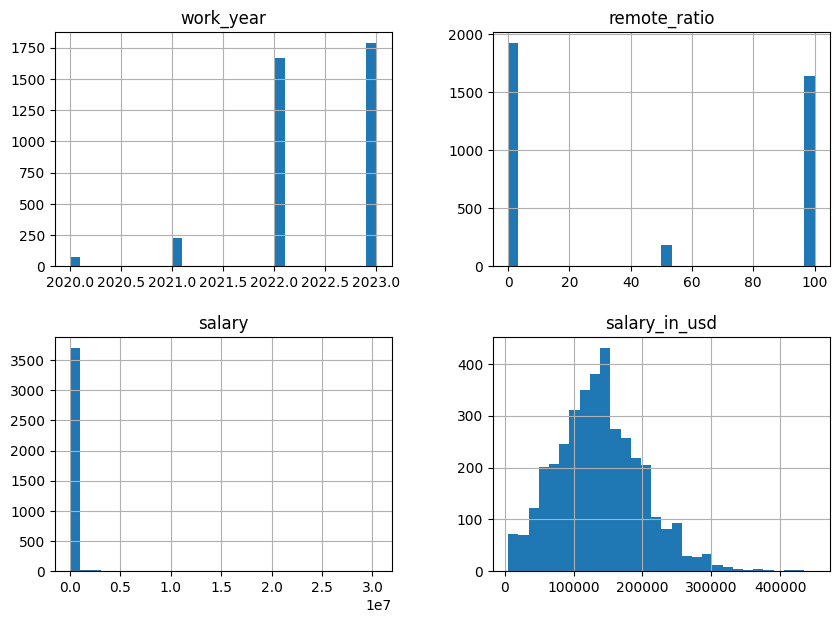

In [10]:
# Plot histograms of numerical columns to understand distribution
numerical_features = ['work_year', 'remote_ratio', 'salary', 'salary_in_usd']
df[numerical_features].hist(bins=30, figsize=(10, 7))


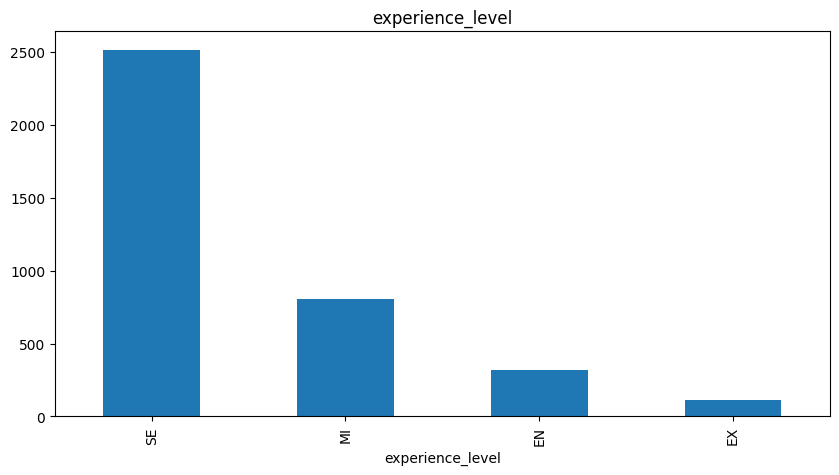

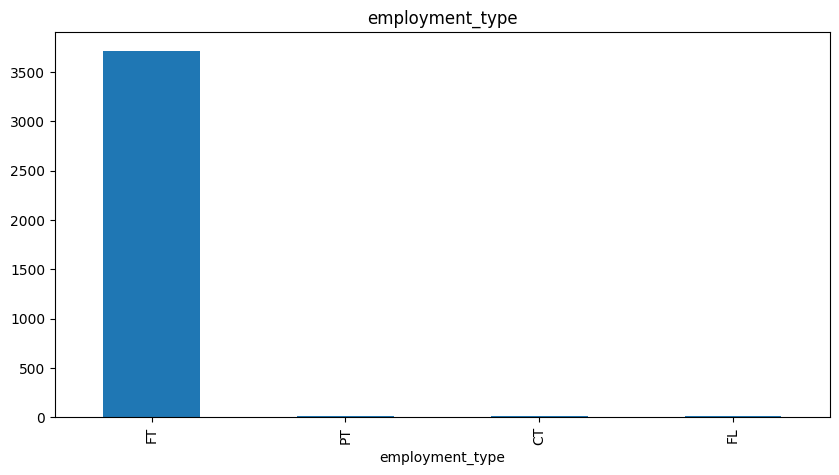

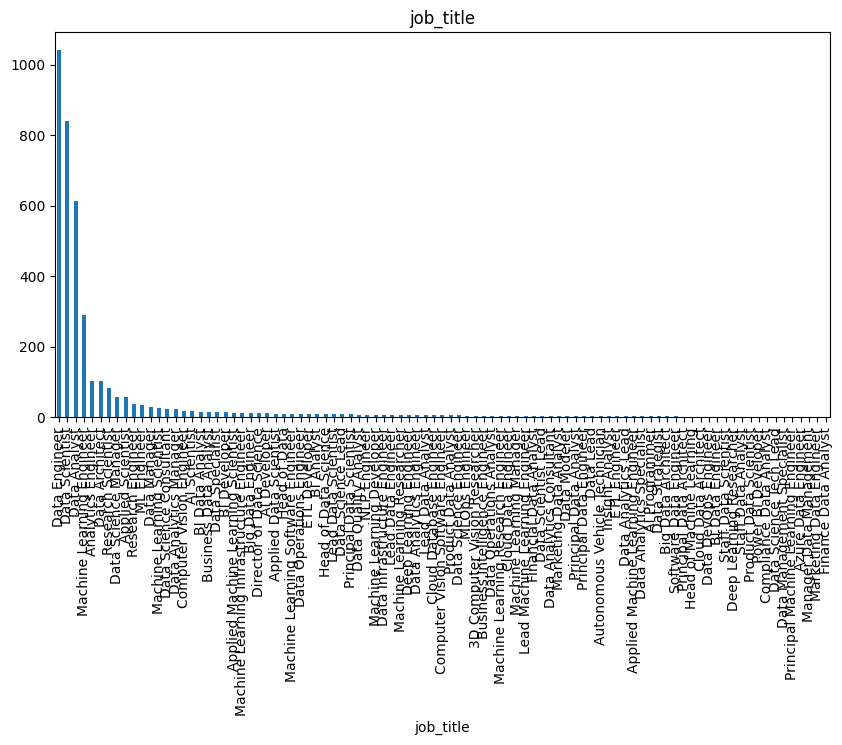

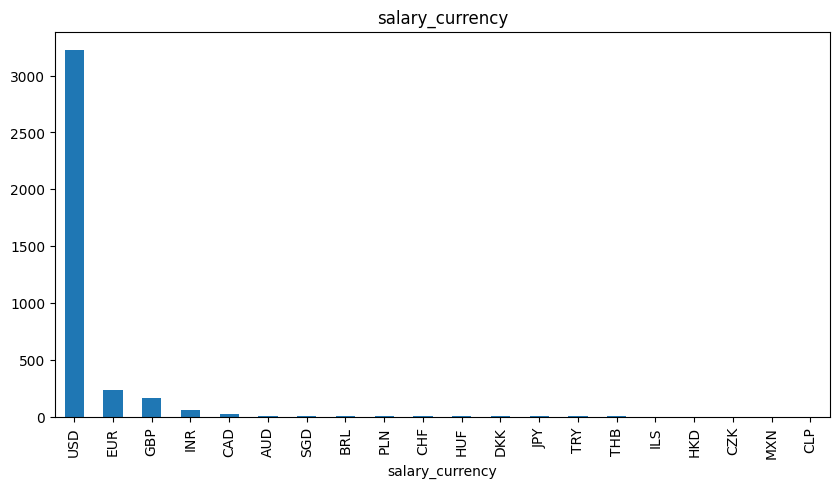

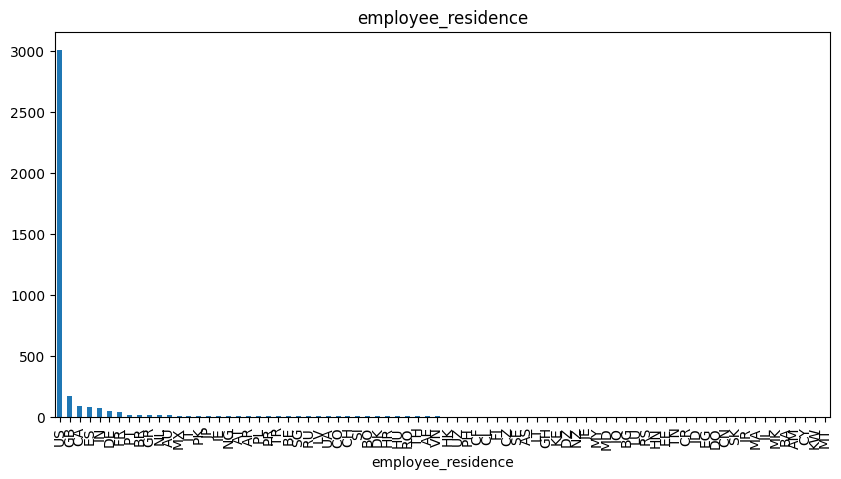

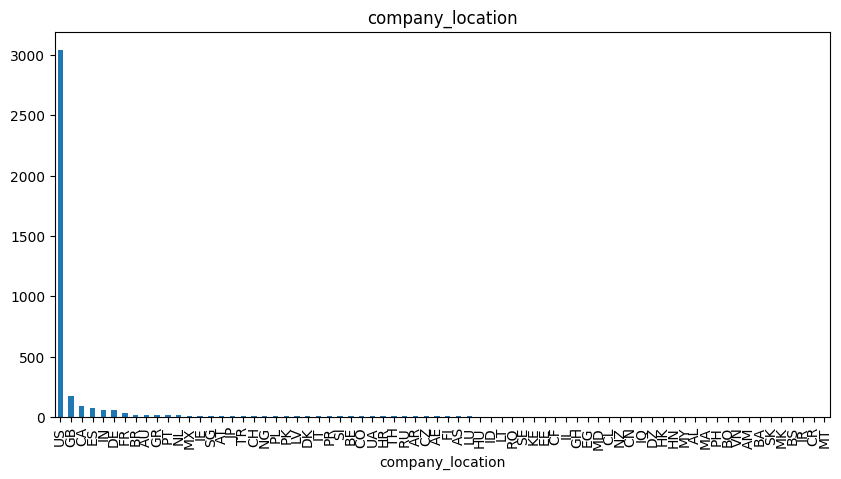

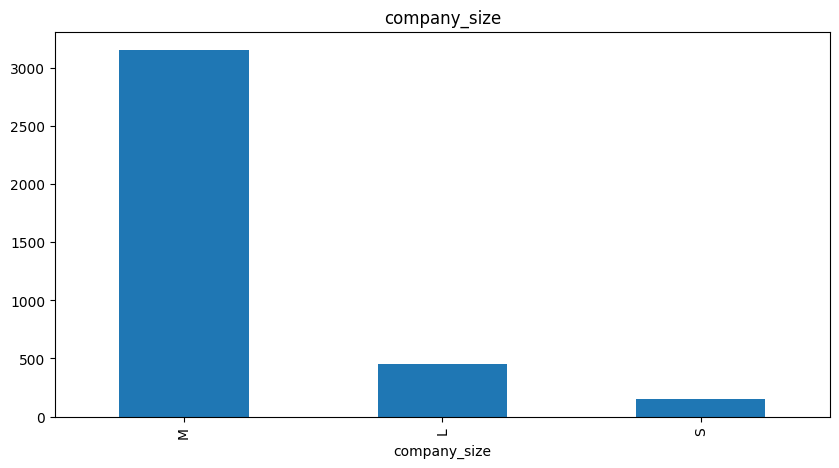

In [12]:
# Plot bar charts of categorical columns to understand distribution
categorical_features = ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']
for feature in categorical_features:
    plt.figure(figsize=(10,5))
    df[feature].value_counts().plot(kind='bar')
    plt.title(feature)
    plt.show()

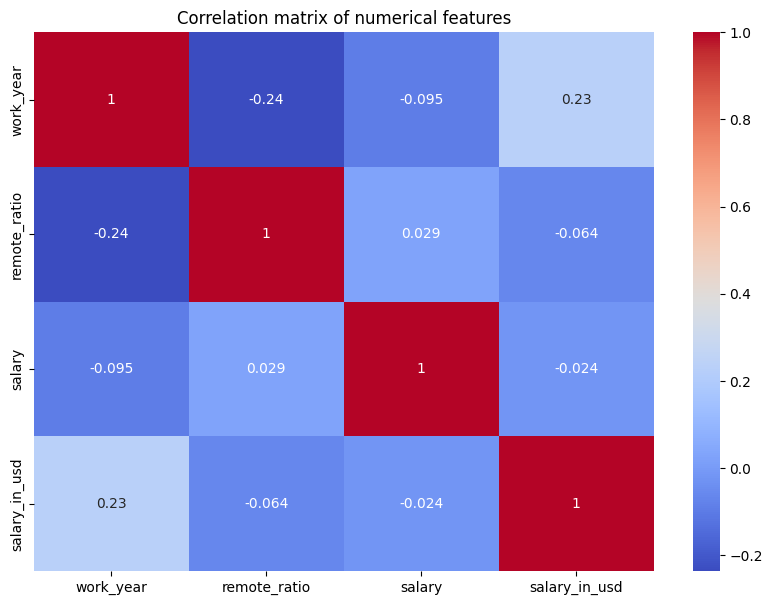

In [13]:
# Plot correlation matrix of numerical features
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10,7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix of numerical features')
plt.show()